XGBoost Evaluation:
MAE: 27.924911499023438
RMSE: 42.918156293676425
R² Score: -0.06665158271789551

Random Forest Evaluation:
MAE: 25.0973
RMSE: 42.918156293676425
R² Score: 0.31202914163292916


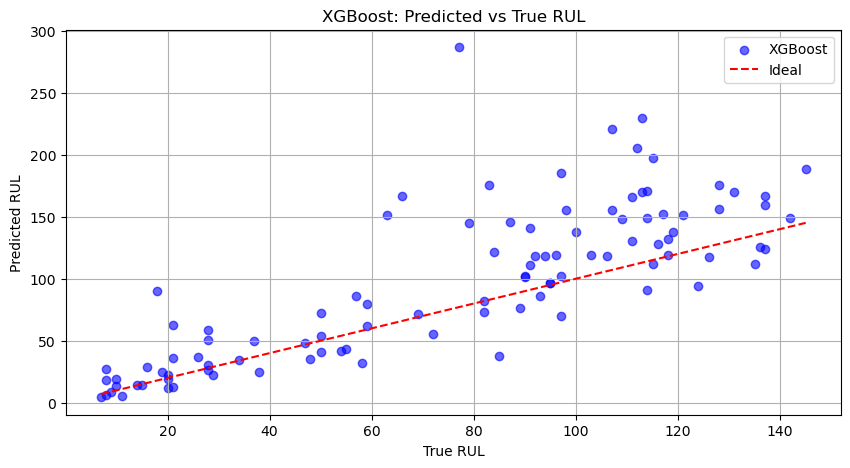

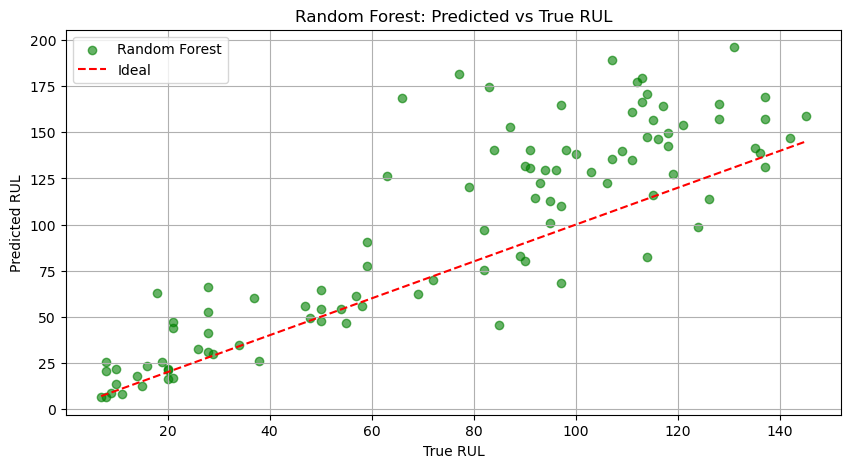

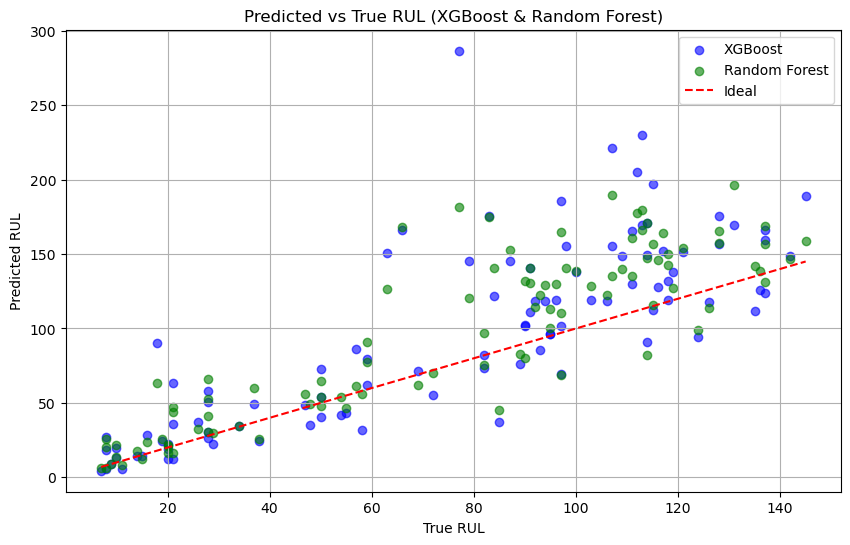

In [4]:
# 1. Imports
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load test set
column_names = [
    'unit', 'cycle', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'
] + [f'sensor_measurement_{i}' for i in range(1, 22)]

df_test = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/test_FD001.txt', sep='\s+', header=None, names=column_names)

# 3. Get final cycle per engine
df_test_rul = df_test.groupby('unit').last().reset_index()

# 4. Load true RUL values
rul_truth = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/RUL_FD001.txt', header=None)[0]
df_test_rul['true_RUL'] = rul_truth.values

# 5. Prepare features for prediction
drop_cols = ['operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_5',
             'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18',
             'sensor_measurement_19']

X_test_final = df_test_rul.drop(columns=['unit', 'cycle', 'true_RUL'] + drop_cols)

# 6. Load models
xgb_model = joblib.load('C:/Users/ammar/SHAP_ML/models/cmaps_xgboost.pkl')
rf_model = joblib.load('C:/Users/ammar/SHAP_ML/models/cmaps_randomforest.pkl')

# 7. Predict RUL
xgb_pred = xgb_model.predict(X_test_final)
rf_pred = rf_model.predict(X_test_final)

# 8. Evaluate
print("XGBoost Evaluation:")
print("MAE:", mean_absolute_error(df_test_rul['true_RUL'], xgb_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(df_test_rul['true_RUL'], xgb_pred)))
print("R² Score:", r2_score(df_test_rul['true_RUL'], xgb_pred))

print("\nRandom Forest Evaluation:")
print("MAE:", mean_absolute_error(df_test_rul['true_RUL'], rf_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(df_test_rul['true_RUL'], xgb_pred)))
print("R² Score:", r2_score(df_test_rul['true_RUL'], rf_pred))

import matplotlib.pyplot as plt

# Scatter Plot - XGBoost
plt.figure(figsize=(10, 5))
plt.scatter(df_test_rul['true_RUL'], xgb_pred, alpha=0.6, label='XGBoost', color='blue')
plt.plot([df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         [df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         'r--', label='Ideal')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('XGBoost: Predicted vs True RUL')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot - Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(df_test_rul['true_RUL'], rf_pred, alpha=0.6, label='Random Forest', color='green')
plt.plot([df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         [df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         'r--', label='Ideal')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Random Forest: Predicted vs True RUL')
plt.legend()
plt.grid(True)
plt.show()

# Combined Scatter Plot - Both Models
plt.figure(figsize=(10, 6))
plt.scatter(df_test_rul['true_RUL'], xgb_pred, alpha=0.6, label='XGBoost', color='blue')
plt.scatter(df_test_rul['true_RUL'], rf_pred, alpha=0.6, label='Random Forest', color='green')
plt.plot([df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         [df_test_rul['true_RUL'].min(), df_test_rul['true_RUL'].max()],
         'r--', label='Ideal')

plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs True RUL (XGBoost & Random Forest)')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/ammar/SHAP_ML/outputs/cmaps_predicted_vs_true_rul.png', bbox_inches='tight', dpi=300)
plt.show()

results_df = df_test_rul[['unit', 'true_RUL']].copy()
results_df['xgb_pred'] = xgb_pred
results_df['rf_pred'] = rf_pred
results_df.to_csv('C:/Users/ammar/SHAP_ML/outputs/cmaps_test_predictions.csv', index=False)